# Logistic Regression

### General dependancies

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_confusion_matrix
import sklearn.metrics
from sklearn.metrics import f1_score


In [22]:
df = pd.read_csv('/content/drive/My Drive/SMA project/Hawaiian_Predictors_revised.csv')
df.head()

X = df.iloc[:,4:-1].values
y = df.iloc[:,32].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [23]:
def evaluate_performance(test_y, test_pred, print_vals=True):
    cnf_matrix = metrics.confusion_matrix(test_y, test_pred)
    
    class_names=['Regime1', 'Regime2', 'Regime3', 'Regime5']
    cnf_matrix = pd.DataFrame(cnf_matrix, index = class_names,
                  columns = class_names)
    
    sns.heatmap(cnf_matrix, annot=True, cmap="magma" ,fmt='g')
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    
    if print_vals :
        count_misclassified = (test_y != test_pred).sum()
        print('Misclassified samples: {}'.format(count_misclassified))
        accuracy = metrics.accuracy_score(test_y, test_pred)
        print('Classification Report:')
        print(metrics.classification_report(test_y, test_pred)) 

### Baseline Logistic Regression

Model score = 0.6854838709677419
Misclassified samples: 39
Classification Report:
              precision    recall  f1-score   support

           1       0.67      0.77      0.72        31
           2       0.76      0.67      0.71        42
           3       0.64      0.36      0.46        25
           5       0.65      0.92      0.76        26

    accuracy                           0.69       124
   macro avg       0.68      0.68      0.66       124
weighted avg       0.69      0.69      0.67       124



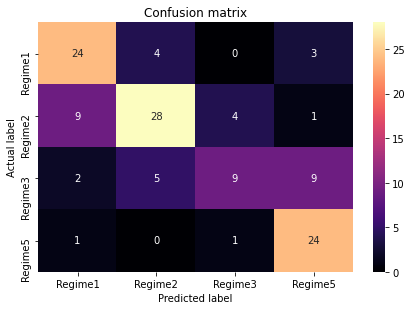

In [24]:
logReg = LogisticRegression(solver = 'saga',max_iter = 10000)
logReg.fit(X, y)

predictions = logReg.predict(X_test)
score = logReg.score(X_test, y_test)
print('Model score =',score)

evaluate_performance(y_test, predictions, print_vals=True)

### Best model for baseline logistic regression

Best model score = 0.7741935483870968
Misclassified samples: 28
Classification Report:
              precision    recall  f1-score   support

           1       0.75      0.87      0.81        31
           2       0.84      0.74      0.78        42
           3       0.63      0.76      0.69        25
           5       0.90      0.73      0.81        26

    accuracy                           0.77       124
   macro avg       0.78      0.77      0.77       124
weighted avg       0.79      0.77      0.78       124



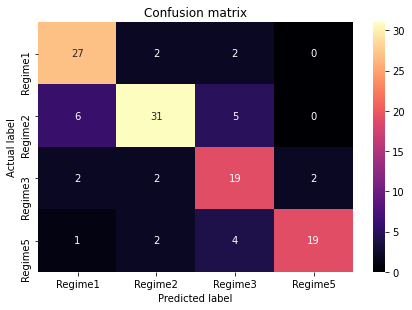

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer
hyperparameters = dict()
clf = GridSearchCV(LogisticRegression(solver='newton-cg',
multi_class='multinomial', penalty='l2',random_state=1),hyperparameters, cv=5, verbose=0,
scoring=make_scorer(metrics.f1_score, average='micro', greater_is_better=True),return_train_score=True)
best_model = clf.fit(X_train, y_train)
best_model.cv_results_

predictions = best_model.predict(X_test)
score = best_model.score(X_test, y_test)
print('Best model score =',score)

evaluate_performance(y_test, predictions, print_vals=True)